<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis

## Dependencies

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


## Google Diet Search Trends


In [8]:
google_diet_search_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/diet_serach_google_trends.csv'

diet = pd.read_csv(google_diet_search_url, parse_dates=['month'], index_col=['month'])
#diet.index = pd.to_datetime(diet.index)
diet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2004-01-01 to 2019-12-01
Data columns (total 1 columns):
diet    192 non-null int64
dtypes: int64(1)
memory usage: 3.0 KB


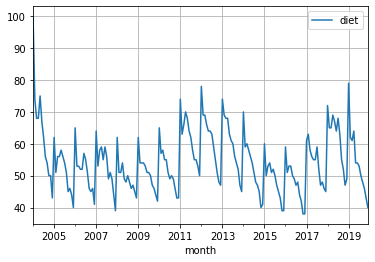

In [9]:
diet.plot(grid=True);

            diet
month           
2012-01-01    78
2012-02-01    69
2012-03-01    69
2012-04-01    66
2012-05-01    64
            diet
month           
2019-08-01    50
2019-09-01    48
2019-10-01    46
2019-11-01    43
2019-12-01    40


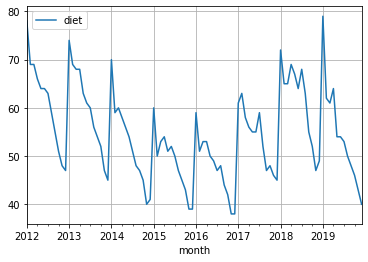

In [24]:
diet2012 = diet[diet.index.year >= 2012]
print(diet2012.head())
print(diet2012.tail())
diet2012.plot(grid=True);

## Merging Time Series With Different Dates

Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas .join() method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

In [30]:
stocks_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/gspc_sp500_stocks.csv'
bonds_url='https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/tnx_us_bonds_us10y.csv'

stocks = pd.read_csv(stocks_url, parse_dates=['Date'], index_col=['Date'])
bonds = pd.read_csv(bonds_url, parse_dates=['Date'], index_col=['Date'])
print(stocks.head())
print(bonds.head())

                   Open         High  ...    Adj Close      Volume
Date                                  ...                         
2010-12-30  1259.439941  1261.089966  ...  1257.880005  1970720000
2010-12-31  1256.760010  1259.339966  ...  1257.640015  1799770000
2011-01-03  1257.619995  1276.170044  ...  1271.869995  4286670000
2011-01-04  1272.949951  1274.119995  ...  1270.199951  4796420000
2011-01-05  1268.780029  1277.630005  ...  1276.560059  4764920000

[5 rows x 6 columns]
             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2010-12-30  3.384  3.421  3.355  3.369      3.369     0.0
2010-12-31  3.324  3.363  3.282  3.305      3.305     0.0
2011-01-02    NaN    NaN    NaN    NaN        NaN     NaN
2011-01-03  3.377  3.420  3.313  3.342      3.342     0.0
2011-01-04  3.338  3.362  3.302  3.346      3.346     0.0


In [36]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

stocks_and_bonds = stocks.join(bonds, how='inner', lsuffix='_stc', rsuffix='_bnd')
stocks_and_bonds.head()

{Timestamp('2016-10-10 00:00:00'), Timestamp('2016-11-11 00:00:00')}


,Open_stc,High_stc,Low_stc,Close_stc,Adj Close_stc,Volume_stc,Open_bnd,High_bnd,Low_bnd,Close_bnd,Adj Close_bnd,Volume_bnd
Date,,,,,,,,,,,,
2010-12-30,1259.439941,1261.089966,1256.319946,1257.880005,1257.880005,1970720000,3.384,3.421,3.355,3.369,3.369,0.0
2010-12-31,1256.760010,1259.339966,1254.189941,1257.640015,1257.640015,1799770000,3.324,3.363,3.282,3.305,3.305,0.0
2011-01-03,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995,4286670000,3.377,3.420,3.313,3.342,3.342,0.0
2011-01-04,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951,4796420000,3.338,3.362,3.302,3.346,3.346,0.0
2011-01-05,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059,4764920000,3.381,3.497,3.379,3.483,3.483,0.0


## Correlation of Stocks and Bonds

            Open_stc  High_stc   Low_stc  ...  Close_bnd  Adj Close_bnd  Volume_bnd
Date                                      ...                                      
2010-12-30       NaN       NaN       NaN  ...        NaN            NaN         NaN
2010-12-31 -0.002128 -0.001388 -0.001695  ...  -0.018997      -0.018997         NaN
2011-01-03  0.000684  0.013364  0.002735  ...   0.011195       0.011195         NaN
2011-01-04  0.012190 -0.001606  0.004008  ...   0.001197       0.001197         NaN
2011-01-05 -0.003276  0.002755  0.002138  ...   0.040944       0.040944         NaN

[5 rows x 12 columns]
0.4381423924113941


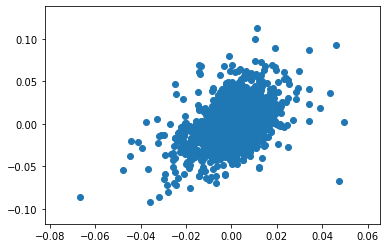

In [40]:
returns = stocks_and_bonds.pct_change()
print(returns.head())
correlation = returns['Close_stc'].corr(returns['Close_bnd'])
print(correlation)
plt.scatter(returns['Close_stc'], returns['Close_bnd']);


## Flying Saucers Aren't Correlated to Flying Markets

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

In [55]:
dji_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/financial-time-series/dow_jones_1990_2019.csv'
ufo_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/ufo_national_reporting.csv'

dji = pd.read_csv(dji_url, parse_dates=['month'], index_col=['month'])
ufo = pd.read_csv(ufo_url, parse_dates=['month'], index_col=['month'])

print(dji.head())
print(ufo.head())

dji = dji.resample('Y').sum()
ufo = ufo.resample('Y').sum()

print(dji.head())
print(ufo.head())

levels = dji.join(ufo, how='inner')
print(levels.head())
print(levels.tail())

                  close
month                  
1990-01-01  2590.540039
1990-02-01  2627.250000
1990-03-01  2707.209961
1990-04-01  2656.760010
1990-05-01  2876.659912
            count
month            
2019-12-01    452
2019-11-01    679
2019-10-01    705
2019-09-01    644
2019-08-01    465
                   close
month                   
1990-12-31  31946.789793
1991-12-31  35572.350343
1992-12-31  39556.609862
1993-12-31  42451.450440
1994-12-31  45514.260008
            count
month            
1990-12-31      6
1991-12-31    117
1992-12-31    129
1993-12-31    145
1994-12-31    191
                   close  count
month                          
1990-12-31  31946.789793      6
1991-12-31  35572.350343    117
1992-12-31  39556.609862    129
1993-12-31  42451.450440    145
1994-12-31  45514.260008    191
                   close  count
month                          
2015-12-31  209855.55373   6909
2016-12-31  216328.59179   5686
2017-12-31  263251.46092   5043
2018-12-31  299952.10

In [59]:
correlation1 = levels['close'].corr(levels['count'])
print("Correlation of levels: ", correlation1)

Correlation of levels:  0.6691135250162759


In [62]:
changes = levels.pct_change()
correlation2 = changes['close'].corr(changes['count'])
print("Correlation of levels: ", correlation2)

Correlation of levels:  0.0420344334388898
